In [263]:
#import packages and modules
import pandas as pd
import seaborn as sns
import numpy as np
import os
from sklearn.cluster import KMeans
from pandas import Series, DataFrame 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import datetime
import matplotlib as mpl
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#read in the web data in excel format.
#the dataset has 1513 lines, and 28 columns
web = pd.read_excel(r'/Users/badewaaderogba/Downloads/web.xlsx')
web

/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [3]:
#columns names for web dataset
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [5]:
#read in the liaison data in excel format.
#the dataset has 825 lines, and 2 columns
liaison = pd.read_excel('/Users/badewaaderogba/Downloads/liaison.xlsx')
liaison

/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [7]:
#read in data erp data in excel format
#the dataset has 825 lines, and 5 columns
erp = pd.read_excel(r'/Users/badewaaderogba/Downloads/erp.xlsx')
erp

/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


# converting our datasets to csv format

In [9]:
data_xls = pd.read_excel(r'/Users/badewaaderogba/Downloads/web.xlsx')
data_xls.to_csv(r'/Users/badewaaderogba/Downloads/csvfile.csv', encoding='utf-8', index=False)

In [10]:
df_web = pd.read_csv('/Users/badewaaderogba/Downloads/csvfile.csv')
df_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [12]:
data_xls1 = pd.read_excel(r'/Users/badewaaderogba/Downloads/erp.xlsx')
data_xls1.to_csv(r'/Users/badewaaderogba/Downloads/erpfile.csv', encoding='utf-8', index=False)

In [13]:
df_erp = pd.read_csv('/Users/badewaaderogba/Downloads/erpfile.csv')
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [15]:
data_xls2 = pd.read_excel(r'/Users/badewaaderogba/Downloads/liaison.xlsx')
data_xls2.to_csv(r'/Users/badewaaderogba/Downloads/liaisonfile.csv', encoding='utf-8', index=False)

In [16]:
df_liaison = pd.read_csv('/Users/badewaaderogba/Downloads/liaisonfile.csv')
df_liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [17]:
pd.set_option('display.float_format',lambda x: '%.3f'%x)

# Reconciliation/merging and cleaning of datasets
#Firstly, we identified the unique id to merge the three datasets. We noticed that the sku column from the web dataset is equivalent to the id_web column form the liaison dataset. Although, they have the same values but unequal lines of unique values. The unique lines in web dataset is 714 against 734 lines in liaison dataset. However, using the product_id, we noticed that the erp and liaison datasets have equal unique values of 825 lines. By observation, we noticed that the only way we can merge the three datasets is to use the liaison dataset as reconciliation key. 
As a result, firstly, we reconcile the liaison and the erp datasets using the product_id using 1-to-1 merging approach. This produced the same number of lines of 825 since they are equally unique to both datasets. Secondly, we merged the web and liaison datasets using the sku and the id_web isng the default inner merged approach which keep only data with the same id from the first and second dataset. This procuced an expected number of lines resulting from the duplication of rows problem that we initially noticed in the web dataset. We checked the duplicates in the entire merged datasets, and we noticed duplications to be 7462. We cleaned the duplicates, and this generated a lines of 1701. By observation, we noticed another problem of duplicates using the sku column and id_web columns. We rechecked the unique value for both sku and id-web columns, and noticed that our final datasets must have 714 unique lines. Since our interest is in the product-line and not the image-line of each product, using the sku and also the id_web, we dropped the duplicates, that is the image-line for each product. This produced 715 lines in our merged datasets. There is still one anomaly in our datasets. We verified the anomaly by searching for the missing value and we noticed that both sku and id_web lack one value.We omitted the missing value because the line is useless for our analysis as it only have values for price and product_id.

In [19]:
#unique identifier in the web datatset using the sku
df_web.sku.nunique()

714

In [20]:
#unique identifier in the erp dataset using the product_id
df_erp.product_id.nunique()

825

In [21]:
##unique identifier in the liaison dataset using the product_id
df_liaison.product_id.nunique()

825

In [22]:
#not unique identifier using the id_web which is equivalent to the sku from the web dataset
df_liaison.id_web.nunique()

734

In [23]:
liasion_erp = pd.merge(df_liaison, df_erp, validate = '1:1')
liasion_erp.columns

Index(['product_id', 'id_web', 'onsale_web', 'price', 'stock_quantity',
       'stock_status'],
      dtype='object')

In [24]:
liasion_erp

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.200,0,outofstock
1,3849,15296,1,34.300,0,outofstock
2,3850,15300,1,20.800,0,outofstock
3,4032,19814,1,14.100,0,outofstock
4,4039,19815,1,46.000,0,outofstock
...,...,...,...,...,...,...
820,7203,NaN,0,45.000,30,instock
821,7204,NaN,0,45.000,9,instock
822,7247,13127-1,1,54.800,23,instock
823,7329,14680-1,0,26.500,14,instock


In [25]:
print(df_liaison.shape)
print(df_erp.shape)
print(liasion_erp.shape)

(825, 2)
(825, 5)
(825, 6)


In [26]:
erp_lia_web = pd.merge(left=liasion_erp, right=df_web, left_on='id_web', right_on ='sku')
erp_lia_web

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.200,0,outofstock,15298,0,0,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
1,3847,15298,1,24.200,0,outofstock,15298,0,0,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
2,3849,15296,1,34.300,0,outofstock,15296,0,0,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
3,3849,15296,1,34.300,0,outofstock,15296,0,0,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
4,3850,15300,1,20.800,0,outofstock,15300,0,0,0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9158,7025,15887,1,69.000,2,instock,15887,0,0,0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
9159,7247,13127-1,1,54.800,23,instock,13127-1,0,0,0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9160,7247,13127-1,1,54.800,23,instock,13127-1,0,0,0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
9161,7338,16230,1,16.300,45,instock,16230,0,0,0,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000


In [27]:
erp_lia_web.duplicated().sum()

7462

In [28]:
#cleaning
erp_lia_web.drop_duplicates(keep='first', inplace=True)
erp_lia_web

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.200,0,outofstock,15298,0,0,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
1,3847,15298,1,24.200,0,outofstock,15298,0,0,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
2,3849,15296,1,34.300,0,outofstock,15296,0,0,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
3,3849,15296,1,34.300,0,outofstock,15296,0,0,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
4,3850,15300,1,20.800,0,outofstock,15300,0,0,0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9158,7025,15887,1,69.000,2,instock,15887,0,0,0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
9159,7247,13127-1,1,54.800,23,instock,13127-1,0,0,0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9160,7247,13127-1,1,54.800,23,instock,13127-1,0,0,0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.000,https://www.wine-spirit.fr/wp-content/uploads/...,0.000,attachment,image/jpeg,0.000
9161,7338,16230,1,16.300,45,instock,16230,0,0,0,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000


In [29]:
erp_lia_web.id_web.nunique()

714

In [30]:
#count the number of times each unique value appears in certain column
pd.value_counts(erp_lia_web['id_web'])

15457    2
15927    2
16281    2
16585    2
15797    2
        ..
14509    2
15149    2
15747    2
15338    2
15346    2
Name: id_web, Length: 714, dtype: int64

In [31]:
#count the number of times each unique value appears in certain column
pd.value_counts(erp_lia_web['sku'])

15457    2
15927    2
16281    2
16585    2
15797    2
        ..
14509    2
15149    2
15747    2
15338    2
15346    2
Name: sku, Length: 714, dtype: int64

In [47]:
new = erp_lia_web.drop_duplicates(subset = ["sku"])
new

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.200,0,outofstock,15298,0,0,0,0.000,6.000,taxable,NaN,2.000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
2,3849,15296,1,34.300,0,outofstock,15296,0,0,0,0.000,0.000,taxable,NaN,2.000,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
4,3850,15300,1,20.800,0,outofstock,15300,0,0,0,0.000,0.000,taxable,NaN,2.000,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
6,4032,19814,1,14.100,0,outofstock,19814,0,0,0,0.000,3.000,taxable,NaN,2.000,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
8,4039,19815,1,46.000,0,outofstock,19815,0,0,0,0.000,0.000,taxable,NaN,2.000,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,6930,16135,1,8.400,83,instock,16135,0,0,0,0.000,5.000,taxable,NaN,2.000,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9155,7023,15891,1,27.500,15,instock,15891,0,0,0,0.000,0.000,taxable,NaN,2.000,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9157,7025,15887,1,69.000,2,instock,15887,0,0,0,0.000,0.000,taxable,NaN,2.000,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9159,7247,13127-1,1,54.800,23,instock,13127-1,0,0,0,0.000,0.000,taxable,NaN,2.000,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gra

In [48]:
#number ofmissing
new.isnull().sum()

product_id                 0
id_web                     1
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
sku                        1
virtual                    0
downloadable               0
rating_count               0
average_rating             1
total_sales                1
tax_status                 1
tax_class                715
post_author                1
post_date                  1
post_date_gmt              1
post_content             715
post_title                 1
post_excerpt               1
post_status                1
comment_status             1
ping_status                1
post_password            715
post_name                  1
post_modified              1
post_modified_gmt          1
post_content_filtered    715
post_parent                1
guid                       1
menu_order                 1
post_type                  1
post_mime_type           715
comment_count              1
dtype: int64

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
new[new['sku'].isnull()]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
38,4055,NaN,0,86.100,0,outofstock,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
new[new['id_web'].isnull()]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
38,4055,NaN,0,86.100,0,outofstock,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#omitting missing values
new.dropna(subset = ["sku"], inplace=True)

<ipython-input-55-bcb0c9a101eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.dropna(subset = ["sku"], inplace=True)


In [56]:
new

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.200,0,outofstock,15298,0,0,0,0.000,6.000,taxable,NaN,2.000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
2,3849,15296,1,34.300,0,outofstock,15296,0,0,0,0.000,0.000,taxable,NaN,2.000,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
4,3850,15300,1,20.800,0,outofstock,15300,0,0,0,0.000,0.000,taxable,NaN,2.000,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
6,4032,19814,1,14.100,0,outofstock,19814,0,0,0,0.000,3.000,taxable,NaN,2.000,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
8,4039,19815,1,46.000,0,outofstock,19815,0,0,0,0.000,0.000,taxable,NaN,2.000,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,6930,16135,1,8.400,83,instock,16135,0,0,0,0.000,5.000,taxable,NaN,2.000,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9155,7023,15891,1,27.500,15,instock,15891,0,0,0,0.000,0.000,taxable,NaN,2.000,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9157,7025,15887,1,69.000,2,instock,15887,0,0,0,0.000,0.000,taxable,NaN,2.000,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.000,https://www.wine-spirit.fr/?post_type=product&...,0.000,product,NaN,0.000
9159,7247,13127-1,1,54.800,23,instock,13127-1,0,0,0,0.000,0.000,taxable,NaN,2.000,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gra

In [57]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 9161
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             714 non-null    int64  
 1   id_web                 714 non-null    object 
 2   onsale_web             714 non-null    int64  
 3   price                  714 non-null    float64
 4   stock_quantity         714 non-null    int64  
 5   stock_status           714 non-null    object 
 6   sku                    714 non-null    object 
 7   virtual                714 non-null    int64  
 8   downloadable           714 non-null    int64  
 9   rating_count           714 non-null    int64  
 10  average_rating         714 non-null    float64
 11  total_sales            714 non-null    float64
 12  tax_status             714 non-null    object 
 13  tax_class              0 non-null      float64
 14  post_author            714 non-null    float64
 15  post_

In [58]:
new.isnull().sum()

product_id                 0
id_web                     0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
dtype: int64

# Exploratory analysis
The total records for price in whatever currency, stock_quantity, and total sales is 714. The corresponding averages are 32.493, 28.746, and 4.013 respectively. The corresponding dispersion values from the center are 27.811, 48.013, and 8.518 respectively. The minimum price is 5.2, the 1st quartile price is 14.1, the median price is 23.550, the Q3 is 42.175, and the maximum price is 225. The differnce between the mean and the median price which is the second quartile shows that the price is skewed. The same analysis for the stock quantity and total sales in terms of the difference between the mean and the median price. Other attributes are for analysis because they are made up of zeros and NAN.

In [59]:
new.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,0.000,714.000,0.000,0.000,0.000,714.000,714.000,714.000
mean,5032.557,1.000,32.493,28.746,0.000,0.000,0.000,0.000,4.013,NaN,1.999,NaN,NaN,NaN,0.000,0.000,0.000
std,790.511,0.000,27.811,48.013,0.000,0.000,0.000,0.000,8.518,NaN,0.037,NaN,NaN,NaN,0.000,0.000,0.000
min,3847.000,1.000,5.200,0.000,0.000,0.000,0.000,0.000,0.000,NaN,1.000,NaN,NaN,NaN,0.000,0.000,0.000
25%,4280.250,1.000,14.100,2.000,0.000,0.000,0.000,0.000,0.000,NaN,2.000,NaN,NaN,NaN,0.000,0.000,0.000
50%,4796.000,1.000,23.550,12.000,0.000,0.000,0.000,0.000,1.000,NaN,2.000,NaN,NaN,NaN,0.000,0.000,0.000
75%,5710.500,1.000,42.175,35.000,0.000,0.000,0.000,0.000,4.000,NaN,2.000,NaN,NaN,NaN,0.000,0.000,0.000
max,7338.000,1.000,225.000,578.000,0.000,0.000,0.000,0.000,96.000,NaN,2.000,NaN,NaN,NaN,0.000,0.000,0.000


# Turnover per product and total turnover
We create a new column to show the turnover per product. The total turnover realized is 70568.6.

In [235]:
new["Turnover_per_product"] = (new["price"] * new["total_sales"])

<ipython-input-235-bd55c8227e3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Turnover_per_product"] = (new["price"] * new["total_sales"])


In [236]:
new

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore,Turnover_per_product
0,3847,15298,1,24.2,0,outofstock,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2,-0.3,145.2
2,3849,15296,1,34.3,0,outofstock,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.1,0.0
4,3850,15300,1,20.8,0,outofstock,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.4,0.0
6,4032,19814,1,14.1,0,outofstock,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3,-0.7,42.3
8,4039,19815,1,46.0,0,outofstock,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,6930,16135,1,8.4,83,instock,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0,-0.9,42.0
9155,7023,15891,1,27.5,15,instock,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.2,0.0
9157,7025,15887,1,69.0,2,instock,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,1.3,0.0
9159,7247,13127-1,1,54.8,23,instock,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clo

In [62]:
pd.options.display.float_format = "{:,.1f}".format

In [237]:
column_name = "Turnover_per_product"
column_sum = new["Turnover_per product"].sum()

In [238]:
print(column_sum)

70568.6


# Outliers for price-graphical analysis to detect the errors
The outliers as reflected in the scatter plot are in red colors which implies value from 77 in whatever currencies. It is the same analysis for the boxplot. The outliers are just the values above the upper limit.

In [68]:
out = new['price'].tolist()
df = pd.DataFrame(out,
                 columns=['price'],
                 index=list(range(1, 715)))

def estimate_gaussian(dataset):

    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

mu, sigma, min_threshold, max_threshold = estimate_gaussian(df.values)

condition1 = (df < min_threshold)
condition2 = (df > max_threshold)

outliers1 = np.extract(condition1, df)
outliers2 = np.extract(condition2, df)

outliers = np.concatenate((outliers1, outliers2), axis=0)

In [69]:
print(outliers)

[ 80.   77.8 100.   88.4  77.4  79.8  83.   79.5 225.   79.5 126.5  77.
  85.6 176.  108.5 157.  104.  109.6  76.8  78.  102.3 137.   78.   78.
  78.  217.5 105.  105.  112.   86.8  92.   83.7 124.8 175.  191.3  93.
 122.  114.   74.5  74.8 135.  105.6 116.4 115.  121.   99.  115.  121.
  78. ]


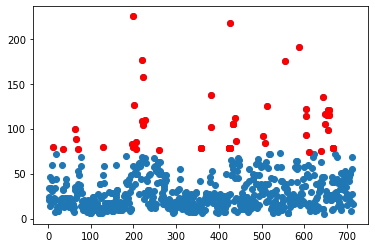

In [70]:
df_red = df[df.values==outliers]

plt.scatter(df.index,df.values)
plt.scatter(df_red.index,df_red.values,c='red')
plt.show()

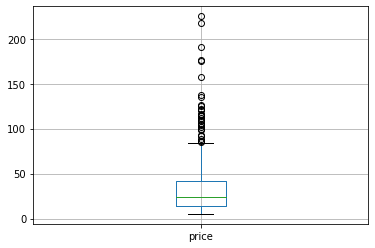

In [72]:
new.boxplot(column='price', return_type='axes');
#newreal.boxplot(column=['price'], return_type='axes');

# #Outliers detection using the 4 methods
Using the z-score. we detected 30 outliers and we deleted them to create a new dataframe of 684 lines without outliers.In comparison to the zscore approach, it appears that the IQR approach is more efficient in removing outliers. 

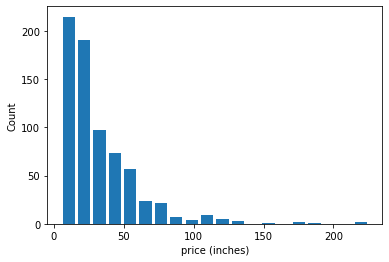

In [83]:
plt.hist(new.price, bins=20, rwidth=0.8)
plt.xlabel('price (inches)')
plt.ylabel('Count')
plt.show()

In [85]:
new.price.describe()

count   714.0
mean     32.5
std      27.8
min       5.2
25%      14.1
50%      23.6
75%      42.2
max     225.0
Name: price, dtype: float64

In [86]:
new.price.mean()

32.49313725490197

In [87]:
new.price.std()

27.810524922323726

In [240]:
#z-score
new['zscore'] = (new.price - new.price.mean())/ new.price.std()
new.head(5)

<ipython-input-240-3d98c8c8c610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['zscore'] = (new.price - new.price.mean())/ new.price.std()


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore,Turnover_per_product
0,3847,15298,1,24.2,0,outofstock,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2,-0.3,145.2
2,3849,15296,1,34.3,0,outofstock,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.1,0.0
4,3850,15300,1,20.8,0,outofstock,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.4,0.0
6,4032,19814,1,14.1,0,outofstock,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3,-0.7,42.3
8,4039,19815,1,46.0,0,outofstock,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.5,0.0


In [89]:
#zscore for the first line
(24.2-32.4931)/27.8105

-0.29820032002301283

In [241]:
new[new['zscore']>2]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore,Turnover_per_product
7861,4115,15382,1,100.0,11,instock,15382,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,NaN,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",publish,closed,closed,NaN,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.4,0.0
7865,4132,11668,1,88.4,5,instock,11668,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,NaN,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,publish,closed,closed,NaN,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.0,0.0
8133,4352,15940,1,225.0,0,outofstock,15940,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,NaN,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"1,125.0",6.9,"1,125.0"
8137,4355,12589,1,126.5,2,instock,12589,0,0,0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,NaN,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"1,391.5",3.4,"1,391.5"
8171,4402,3510,1,176.0,8,instock,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,NaN,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,publish,closed,closed,NaN,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"2,288.0",5.2,"2,288.0"
8173,4404,3507,1,108.5,2,instock,3507,0,0,0,0.0,2.0,taxable,NaN,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,NaN,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",publish,closed,closed,NaN,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0,2.7,217.0
8177,4406,7819,1,157.0,3,instock,7819,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,NaN,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,publish,closed,closed,NaN,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.5,0.0
8179,4407,3509,1,104.0,6,instock,3509,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-03-22 11:49:53,2018-03-22 10:49:53,NaN,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,publish,closed,closed,NaN,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0,2.6,104.0
8189,4582,12857,1,109.6,7,instock,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,2018-04-12 15:56:13,NaN,Château de Meursault Puligny-Montrachet 1er Cr...,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,NaN,chateau-de-puligny-montrachet-1cru-champ-canet...,20

In [242]:
#delete the outliers and produce new dataframe
new_no_outliers = new[(new.zscore<2)]
new_no_outliers.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore,Turnover_per_product
0,3847,15298,1,24.2,0,outofstock,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2,-0.3,145.2
2,3849,15296,1,34.3,0,outofstock,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.1,0.0
4,3850,15300,1,20.8,0,outofstock,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.4,0.0
6,4032,19814,1,14.1,0,outofstock,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3,-0.7,42.3
8,4039,19815,1,46.0,0,outofstock,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.5,0.0


In [243]:
new_no_outliers.shape

(684, 37)

In [244]:
#number of outliers using IQR is 32
new.shape[0] - new_no_outliers.shape[0]

30

<AxesSubplot:ylabel='price'>

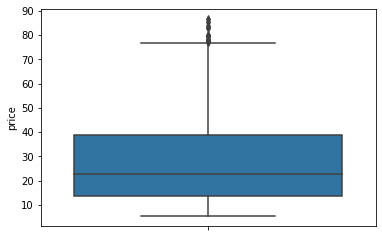

In [245]:
sns.boxplot(y=new_no_outliers['price'])

In [246]:
#IQR
Q1= np.percentile(new.price, 25)
Q3= np.percentile(new.price, 75)

In [247]:
IQR =Q3-Q1

In [248]:
lower_limit=Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

In [249]:
upper_limit

84.28750000000001

In [250]:
new[new['price']>upper_limit]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore,Turnover_per_product
7861,4115,15382,1,100.0,11,instock,15382,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,NaN,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",publish,closed,closed,NaN,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.4,0.0
7865,4132,11668,1,88.4,5,instock,11668,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,NaN,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,publish,closed,closed,NaN,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.0,0.0
8133,4352,15940,1,225.0,0,outofstock,15940,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,NaN,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"1,125.0",6.9,"1,125.0"
8137,4355,12589,1,126.5,2,instock,12589,0,0,0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,NaN,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"1,391.5",3.4,"1,391.5"
8145,4359,13853,1,85.6,0,outofstock,13853,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,NaN,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,publish,closed,closed,NaN,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6,1.9,85.6
8171,4402,3510,1,176.0,8,instock,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,NaN,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,publish,closed,closed,NaN,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"2,288.0",5.2,"2,288.0"
8173,4404,3507,1,108.5,2,instock,3507,0,0,0,0.0,2.0,taxable,NaN,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,NaN,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",publish,closed,closed,NaN,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0,2.7,217.0
8177,4406,7819,1,157.0,3,instock,7819,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,NaN,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,publish,closed,closed,NaN,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.5,0.0
8179,4407,3509,1,104.0,6,instock,3509,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-03-22 11:49:53,2018-03-22 10:49:53,NaN,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,publish,closed,closed,NaN,cognac-frapin-cigar-blend,20

In [251]:
#show outliers
new[(new.price>upper_limit) | (new.price<lower_limit)]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore,Turnover_per_product
7861,4115,15382,1,100.0,11,instock,15382,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,NaN,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",publish,closed,closed,NaN,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.4,0.0
7865,4132,11668,1,88.4,5,instock,11668,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,NaN,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,publish,closed,closed,NaN,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.0,0.0
8133,4352,15940,1,225.0,0,outofstock,15940,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,NaN,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"1,125.0",6.9,"1,125.0"
8137,4355,12589,1,126.5,2,instock,12589,0,0,0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,NaN,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"1,391.5",3.4,"1,391.5"
8145,4359,13853,1,85.6,0,outofstock,13853,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,NaN,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,publish,closed,closed,NaN,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6,1.9,85.6
8171,4402,3510,1,176.0,8,instock,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,NaN,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,publish,closed,closed,NaN,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,"2,288.0",5.2,"2,288.0"
8173,4404,3507,1,108.5,2,instock,3507,0,0,0,0.0,2.0,taxable,NaN,2.0,2018-03-22 11:32:55,2018-03-22 10:32:55,NaN,Cognac Frapin Château de Fontpinot XO,"Exclusivement vendangé, distillé, vieilli et m...",publish,closed,closed,NaN,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0,2.7,217.0
8177,4406,7819,1,157.0,3,instock,7819,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,NaN,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,publish,closed,closed,NaN,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.5,0.0
8179,4407,3509,1,104.0,6,instock,3509,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-03-22 11:49:53,2018-03-22 10:49:53,NaN,Cognac Frapin Cigar Blend,Ce cognac bénéficie d'un vieillissement plus l...,publish,closed,closed,NaN,cognac-frapin-cigar-blend,20

In [113]:
#show no-outliers
new[(new.price<upper_limit) & (new.price>lower_limit)]

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore
0,3847,15298,1,24.2,0,outofstock,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2,-0.3
2,3849,15296,1,34.3,0,outofstock,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.1
4,3850,15300,1,20.8,0,outofstock,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.4
6,4032,19814,1,14.1,0,outofstock,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3,-0.7
8,4039,19815,1,46.0,0,outofstock,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,6930,16135,1,8.4,83,instock,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0,-0.9
9155,7023,15891,1,27.5,15,instock,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.2
9157,7025,15887,1,69.0,2,instock,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,1.3
9159,7247,13127-1,1,54.8,23,instock,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très

In [252]:
#number of dataframe withour outliers is 682
new_no_outliers_IQR=new[(new.price<upper_limit) & (new.price>lower_limit)]
new_no_outliers_IQR.shape

(682, 37)

In [253]:
#number of outliers using IQR is 32
new.shape[0] - new_no_outliers_IQR.shape[0]

32

<AxesSubplot:ylabel='price'>

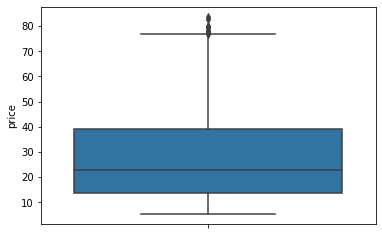

In [116]:
sns.boxplot(y=new_no_outliers_IQR['price'])

In [129]:
out = new['price'].tolist()
out1 = new['Turnover_per product'].tolist()
df = pd.DataFrame(out,
                 columns=['Turnover_per product'],
                 index=list(range(1, 715)))

def estimate_gaussian(dataset):

    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

mu, sigma, min_threshold, max_threshold = estimate_gaussian(df.values)

condition1 = (df < min_threshold)
condition2 = (df > max_threshold)

outliers1 = np.extract(condition1, df)
outliers2 = np.extract(condition2, df)

outliers = np.concatenate((outliers1, outliers2), axis=0)

In [132]:
out = new['price'].tolist()
df1 = pd.DataFrame(out1,
                 columns=['price'],
                 index=list(range(1, 715)))

def estimate_gaussian(dataset):

    mu = np.mean(dataset) # moyenne cf mu
    sigma = np.std(dataset) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

mu, sigma, min_threshold, max_threshold = estimate_gaussian(df1.values)

condition1 = (df1 < min_threshold)
condition2 = (df1 > max_threshold)

outliers1 = np.extract(condition1, df1)
outliers2 = np.extract(condition2, df1)

outlier = np.concatenate((outliers1, outliers2), axis=0)

In [130]:
print(outliers)

[ 80.   77.8 100.   88.4  77.4  79.8  83.   79.5 225.   79.5 126.5  77.
  85.6 176.  108.5 157.  104.  109.6  76.8  78.  102.3 137.   78.   78.
  78.  217.5 105.  105.  112.   86.8  92.   83.7 124.8 175.  191.3  93.
 122.  114.   74.5  74.8 135.  105.6 116.4 115.  121.   99.  115.  121.
  78. ]


In [133]:
print(outlier)

[ 596.4 1018.9  716.  1029.2  630.8 1560.  1590.  4263.  1044.   585.
  698.  4704.  1125.  1391.5  619.2 2288.  1009.7 1004.4  685.   892.8
  958.4  573.9  824.5 1033.2  932.4]


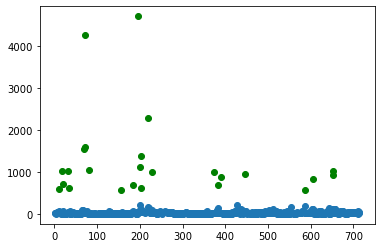

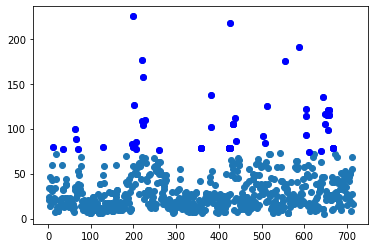

In [137]:
df_red = df1[df1.values==outlier]
plt.scatter(df1.index,df.values)
plt.scatter(df_red.index,df_red.values,c='green')
plt.show()
df_blue = df[df.values==outliers]
plt.scatter(df.index,df.values)
plt.scatter(df_blue.index,df_blue.values,c='blue')
plt.show()

In [153]:
#data cleaning for Kmeans
new_no_outliers_IQR

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Turnover_per product,zscore
0,3847,15298,1,24.2,0,outofstock,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2,-0.3
2,3849,15296,1,34.3,0,outofstock,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.1
4,3850,15300,1,20.8,0,outofstock,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.4
6,4032,19814,1,14.1,0,outofstock,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3,-0.7
8,4039,19815,1,46.0,0,outofstock,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,6930,16135,1,8.4,83,instock,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0,-0.9
9155,7023,15891,1,27.5,15,instock,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.2
9157,7025,15887,1,69.0,2,instock,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,1.3
9159,7247,13127-1,1,54.8,23,instock,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très

In [154]:
new_no_outliers_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 9161
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             682 non-null    int64  
 1   id_web                 682 non-null    object 
 2   onsale_web             682 non-null    int64  
 3   price                  682 non-null    float64
 4   stock_quantity         682 non-null    int64  
 5   stock_status           682 non-null    object 
 6   sku                    682 non-null    object 
 7   virtual                682 non-null    int64  
 8   downloadable           682 non-null    int64  
 9   rating_count           682 non-null    int64  
 10  average_rating         682 non-null    float64
 11  total_sales            682 non-null    float64
 12  tax_status             682 non-null    object 
 13  tax_class              0 non-null      float64
 14  post_author            682 non-null    float64
 15  post_

In [155]:
#subset clustering variables
kcluster=new_no_outliers_IQR[['price', 'stock_quantity', 'total_sales']]

In [156]:
kcluster.describe()

,price,stock_quantity,total_sales
count,682.0,682.0,682.0
mean,28.2,29.8,4.1
std,18.3,48.9,8.7
min,5.2,0.0,0.0
25%,13.7,2.0,0.0
50%,22.8,13.0,1.0
75%,39.0,36.0,5.0
max,83.7,578.0,96.0


In [159]:
#standardize clustering variables to have mean=0 and sd=1
kclustervar = kcluster.copy()
kclustervar['price'] = preprocessing.scale(kclustervar['price'].astype('float64'))
kclustervar['stock_quantity'] = preprocessing.scale(kclustervar['stock_quantity'].astype('float64'))
kclustervar['total_sales'] = preprocessing.scale(kclustervar['total_sales'].astype('float64'))

In [161]:
#split data into train and test sets
kclus_train, kclus_test = train_test_split(kclustervar, test_size=.3, random_state=123)

In [165]:
#k-means clsuter analysis for 1-10 clusters
clusters=range(1,9)
meandist=[] #to store the average distance value to be calculated

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(kclus_train)
    clusassign=model.predict(kclus_train)
    meandist.append(sum(np.min(cdist(kclus_train, model.cluster_centers_, 'euclidean'), axis=1))
                       /kclus_train.shape[0])

Text(0.5, 1.0, 'selecting k with the elbow method')

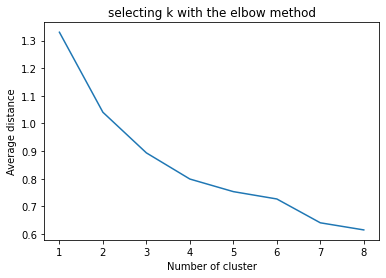

In [168]:
#plot average distance from the observations from the cluster centroid to use the elbow method to id
#identify the number of clusters to select
plt.plot(clusters, meandist)
plt.xlabel('Number of cluster')
plt.ylabel('Average distance')
plt.title('selecting k with the elbow method')

In [185]:
#between 2, 3,4. interprete 4 cluster solution
model5=KMeans(n_clusters=5)
model5.fit(kclus_train)
clusassign=model5.predict(kclus_train)

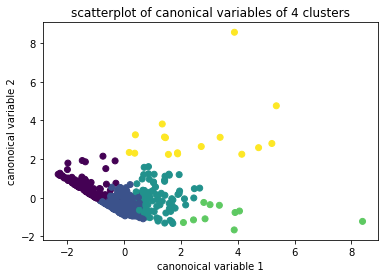

In [186]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(kclus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model5.labels_,)
plt.xlabel('canonoical variable 1')
plt.ylabel('canonoical variable 2')
plt.title('scatterplot of canonical variables of 4 clusters')
plt.show()

In [203]:
#patterns of means on the clustering variables for each cluster to see whether they are unique and meaningful
kcluslist=list(kclus_train['index'])
labels=list(model5.labels_)
newlist=dict(zip(kcluslist, labels))
newlist

{8985: 4,
 7925: 2,
 8283: 0,
 8253: 0,
 8827: 2,
 9083: 1,
 9057: 1,
 8725: 1,
 7971: 2,
 9097: 1,
 8887: 1,
 8675: 0,
 9145: 1,
 8755: 0,
 8293: 1,
 8825: 0,
 36: 0,
 8643: 1,
 8343: 4,
 7795: 4,
 0: 1,
 7883: 1,
 8361: 1,
 9061: 0,
 8303: 1,
 8307: 2,
 8255: 0,
 8169: 0,
 8785: 2,
 8095: 1,
 8965: 1,
 8811: 2,
 8119: 1,
 8321: 3,
 8629: 0,
 7887: 0,
 8895: 0,
 8509: 1,
 7783: 2,
 9065: 0,
 8395: 1,
 8141: 0,
 8155: 0,
 7867: 1,
 8263: 1,
 8301: 1,
 8333: 1,
 8315: 1,
 9053: 1,
 7845: 1,
 8427: 1,
 9113: 1,
 8589: 0,
 8763: 0,
 8481: 4,
 8425: 1,
 8961: 1,
 8035: 2,
 8479: 1,
 8287: 1,
 7949: 1,
 8831: 0,
 7967: 1,
 8223: 2,
 8319: 1,
 8345: 2,
 7833: 1,
 8241: 0,
 8097: 0,
 8147: 0,
 8053: 1,
 8217: 2,
 8615: 2,
 9005: 0,
 8371: 1,
 8979: 0,
 8865: 1,
 8571: 1,
 8919: 1,
 8383: 4,
 8153: 0,
 7989: 0,
 8089: 1,
 8709: 0,
 8557: 2,
 8619: 0,
 7959: 3,
 7929: 4,
 8387: 2,
 7775: 2,
 8877: 1,
 8881: 1,
 8309: 1,
 8871: 1,
 8323: 1,
 8669: 1,
 8267: 1,
 8107: 1,
 8993: 2,
 8167: 0,
 9087

In [205]:
newcluster=DataFrame.from_dict(newlist, orient='index')
newcluster

,0
8985,4
7925,2
8283,0
8253,0
8827,2
...,...
7935,3
8399,2
8523,1
8485,1


In [206]:
newcluster.columns=['cluster']

In [208]:
newcluster.reset_index(level=0, inplace=True)

In [210]:
merged_train=pd.merge(kclus_train, newcluster, on='index')

In [211]:
merged_train.head(n=100)

,level_0,index,price,stock_quantity,total_sales,cluster
0,0,8985,-0.9,0.3,3.9,4
1,1,7925,-1.1,0.6,-0.0,2
2,2,8283,0.8,-0.4,-0.5,0
3,3,8253,1.2,-0.5,-0.5,0
4,4,8827,-0.2,-0.6,1.9,2
...,...,...,...,...,...,...
95,95,8669,-0.7,0.0,-0.5,1
96,96,8267,-0.2,-0.4,-0.2,1
97,97,8107,-0.3,0.1,-0.4,1
98,98,8993,-0.8,0.2,0.6,2


In [213]:
clustergroup =merged_train.groupby('cluster').mean()
print("clustering variable means by cluster")
print(clustergroup)

clustering variable means by cluster
         level_0   index  price  stock_quantity  total_sales
cluster                                                     
0          228.1 8,316.2    1.5            -0.5         -0.3
1          243.8 8,189.5   -0.4            -0.2         -0.3
2          242.1 8,291.2   -0.8             0.7          0.6
3          230.2 8,130.6   -1.1             4.5          0.5
4          201.7 7,698.8   -0.2             0.5          4.1


In [214]:
clustergroup =merged_train.groupby('cluster').std()
print("clustering variable std by cluster")
print(clustergroup)

clustering variable std by cluster
         level_0   index  price  stock_quantity  total_sales
cluster                                                     
0          140.0 1,616.1    0.7             0.2          0.3
1          136.6 1,612.6    0.4             0.3          0.3
2          134.2   372.8    0.3             0.8          0.8
3          152.9   260.3    0.1             2.5          0.6
4          157.7 2,080.2    0.9             1.5          1.8


In [254]:
#how the clusters differs on turnover
turnover_data=new_no_outliers_IQR['Turnover_per_product']

In [255]:
turnover_train, turnover_test = train_test_split(turnover_data, test_size=.3, random_state=123)
turnover_data1=pd.DataFrame(turnover_data)
turnover_data1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(turnover_data1, merged_train, on='index')
sub1 = merged_train_all[['Turnover_per_product', 'cluster']]. dropna()

In [256]:
gpamodel = smf.ols(formula='Turnover_per_product ~ C(cluster)', data=sub1).fit()
print(gpamodel.summary())

                             OLS Regression Results                             
Dep. Variable:     Turnover_per_product   R-squared:                       0.428
Model:                              OLS   Adj. R-squared:                  0.424
Method:                   Least Squares   F-statistic:                     88.44
Date:                  Fri, 23 Jul 2021   Prob (F-statistic):           4.80e-56
Time:                          15:11:36   Log-Likelihood:                -3208.6
No. Observations:                   477   AIC:                             6427.
Df Residuals:                       472   BIC:                             6448.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          72.

In [257]:
mean1 =sub1.groupby('cluster').mean()
print("means of total turnover by cluster")
print(mean1)

means of total turnover by cluster
         Turnover_per_product
cluster                      
0                        72.6
1                        38.5
2                       140.6
3                        74.0
4                     1,014.7


In [259]:
std1 =sub1.groupby('cluster').std()
print("std of total turnover by cluster")
print(std1)

std of total turnover by cluster
         Turnover_per_product
cluster                      
0                       169.1
1                        58.2
2                       123.0
3                        47.1
4                       968.8


# No time to analyze the latter part. Thanks